In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%run ../scripts/import_n_clean.py

In [3]:
print('aantal vrouwen in de dataset: ',clicks_n_users_n_ads_n_websites['gender'].value_counts()['F'],
     ', aantal mannen in de dataset: ',clicks_n_users_n_ads_n_websites['gender'].value_counts()['M'])

aantal vrouwen in de dataset:  14948 , aantal mannen in de dataset:  15621


In [4]:
clicks_n_users_n_ads_n_websites.groupby('gender')['ads_shown'].aggregate(['count','sum','min', 'median', 'mean','max','describe'])

count       sum       min    median       mean       max describe  \
       ads_shown ads_shown ads_shown ads_shown  ads_shown ads_shown    count   
gender                                                                         
F          14948    625326         1      40.0  41.833423        79  14948.0   
M          15621    668573         1      42.0  42.799629        78  15621.0   

                                                           
             mean        std  min   25%   50%   75%   max  
gender                                                     
F       41.833423  17.982376  1.0  28.0  40.0  54.0  79.0  
M       42.799629  17.218478  1.0  31.0  42.0  54.0  78.0

In [5]:
users_not_in_dataset = all_users[~all_users.id.isin(clicks_n_users_n_ads_n_websites['user_id'])]

In [6]:
users_not_in_dataset

,id,ads_shown,age,gender,location,user_age_intervals_ad
19,user19,0,28,M,Belgium,25-34
37,user37,0,84,M,Luxembourg,55+
40,user40,0,40,M,France,35-44
73,user73,0,41,F,Germany,35-44
117,user117,0,37,F,Belgium,35-44
148,user148,0,48,F,Netherlands,45-54
224,user224,0,41,M,Luxembourg,35-44
371,user371,0,45,M,Luxembourg,45-54
489,user489,0,35,F,Luxembourg,35-44
543,user543,0,46,F,Netherlands,45-54


In [7]:
gender_n_age_ads = pd.DataFrame(clicks_n_users_n_ads_n_websites.groupby(['gender','user_age_exact'])['ads_shown'].count())

In [8]:
age_ads = pd.DataFrame(clicks_n_users_n_ads_n_websites.groupby(['user_age_exact','ads_shown','gender'])['ads_shown'].sum())

In [10]:
user_stats = clicks_n_users_n_ads_n_websites.groupby([ 'location', 'category_website']).agg(
    ads_shown = ('ads_shown', 'sum'),
    true_count=('did_click', 'sum'),
    false_count=('did_click', lambda x: (~x).sum())
).reset_index()

# Calculate probabilities

user_stats['probability_true'] = (user_stats['true_count'] / user_stats['ads_shown'])*100
user_stats['probability_false'] = (user_stats['false_count'] / user_stats['ads_shown'])*100


<Figure size 800x500 with 0 Axes>

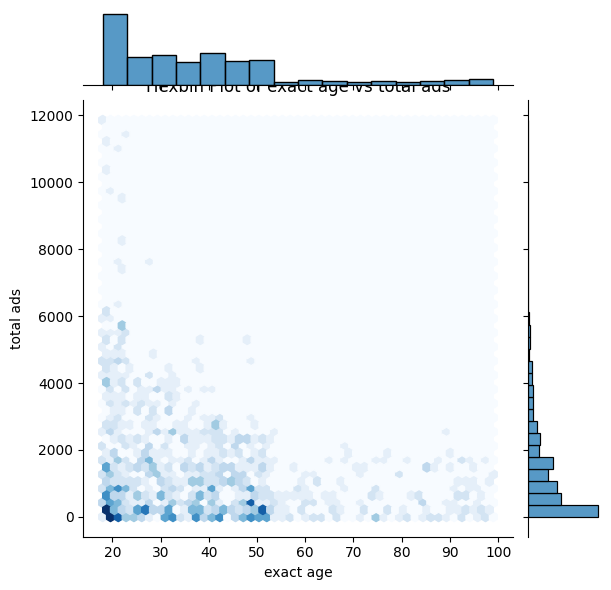

In [11]:
# Hexbin Plot
plt.figure(figsize=(8, 5))
sns.jointplot(x="user_age_exact", y="ads_shown",kind='hex',  data=age_ads, gridsize=50, cmap="Blues")
plt.title("Hexbin Plot of exact age vs total ads")
plt.xlabel("exact age")
plt.ylabel("total ads")
plt.show()

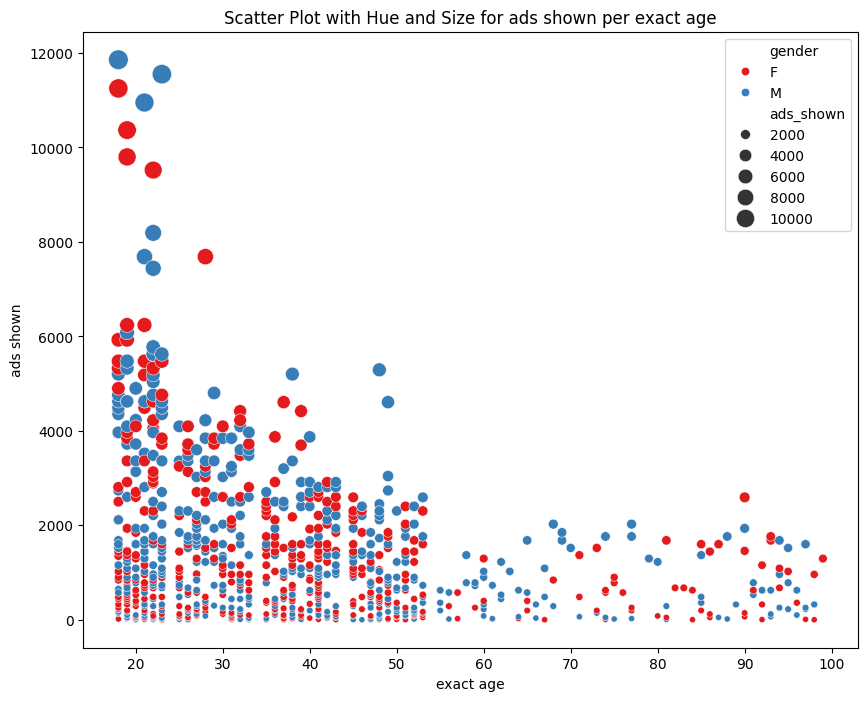

In [12]:
# Scatter Plot with Hue and Size
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="user_age_exact", 
    y="ads_shown", 
    data=age_ads, 
    hue="gender",      # Color by gender (categorical)
    size="ads_shown",    # Vary marker size by ads_shown column (numerical)
    sizes=(20, 200),  # Define the size range for markers
    palette="Set1"  # Color palette
)
plt.title("Scatter Plot with Hue and Size for ads shown per exact age")
plt.xlabel("exact age")
plt.ylabel("ads shown")
plt.legend(title="")
plt.show()

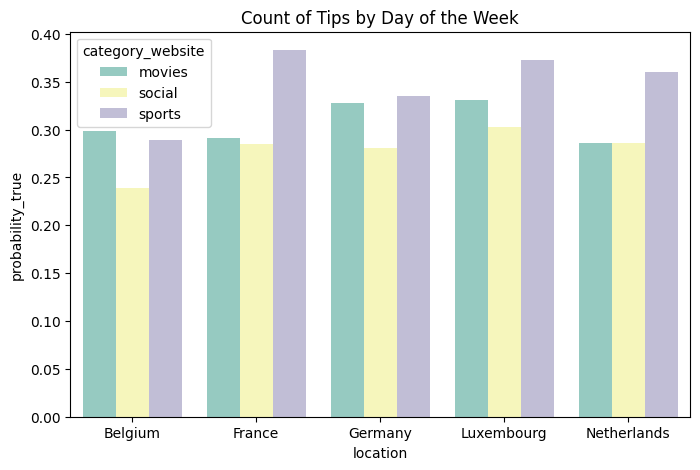

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x="location", y="probability_true", data=user_stats, hue="category_website", palette="Set3")
plt.title("Count of Tips by Day of the Week")
plt.show()